In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [3]:
import cv2

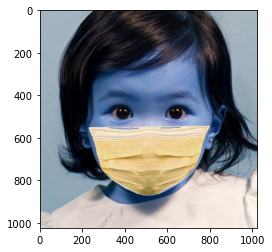

In [10]:
path = "Dataset/with_mask/00003_Mask.jpg"
image = cv2.imread(path)
plt.imshow(image)

In [5]:
DatasetPath = "Dataset"
dataset = []
labels = []
for folder in os.listdir(DatasetPath):
    inner = f"{DatasetPath}/{folder}"
    for image in os.listdir(inner):
        imagePath = f"{inner}/{image}"
        img = cv2.imread(imagePath)
        imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        imgResized = cv2.resize(imgGray, (0, 0), fx =0.25, fy = 0.25)
        dataset.append(imgResized)
        labels.append(folder)

C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

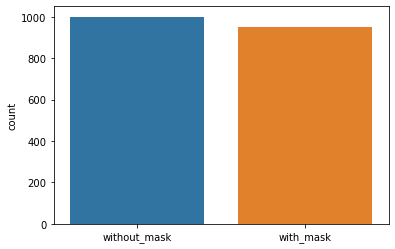

In [6]:
sns.countplot(labels)

In [7]:
array = np.array(dataset)

In [8]:
array = array.reshape(1950, 256, 256, 1)

In [9]:
array[0].shape

(256, 256, 1)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

labels = encoder.fit_transform(labels)

In [12]:
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

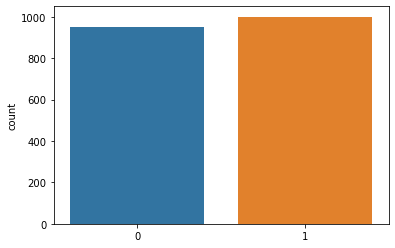

In [32]:
sns.countplot(labels)

In [51]:
from sklearn.model_selection import train_test_split

X_train_, X_test, y_train_, y_test = train_test_split(array, labels, test_size = 0.2, random_state = 30)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_, y_train_, test_size = 0.2, random_state = 30)

In [88]:
X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0

In [85]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                              strides=(1, 1), activation = "relu",
                              input_shape =[256, 256, 1]))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 300, activation = "relu"))
model.add(keras.layers.Dense(units = 1, activation = "sigmoid"))


model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)           

In [87]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [92]:
history = model.fit(X_train, y_train, epochs =3, validation_data =(X_valid, y_valid))

Epoch 1/3
39/39 [==============================] - 164s 4s/step - loss: 0.6299 - accuracy: 0.6979 - val_loss: 0.2181 - val_accuracy: 0.9199
Epoch 2/3
39/39 [==============================] - 136s 3s/step - loss: 0.1102 - accuracy: 0.9567 - val_loss: 0.0608 - val_accuracy: 0.9808
Epoch 3/3
39/39 [==============================] - 135s 3s/step - loss: 0.0345 - accuracy: 0.9904 - val_loss: 0.0291 - val_accuracy: 0.9872


In [94]:
history.history

{'loss': [0.6299303770065308, 0.11019022017717361, 0.03449589014053345],
 'accuracy': [0.6979166865348816, 0.9567307829856873, 0.9903846383094788],
 'val_loss': [0.21810348331928253, 0.06084834784269333, 0.029108215123414993],
 'val_accuracy': [0.9198718070983887, 0.9807692170143127, 0.9871794581413269]}

In [95]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 11s 861ms/step - loss: 0.0485 - accuracy: 0.9795


[0.048519160598516464, 0.9794871807098389]

# Saving the Model

In [98]:
model_json = model.to_json()

with open("model.json", "w") as f:
    f.write(model_json)
model.save_weights("model.h5")
print("Model Saved")

Model Saved


In [109]:
pred = model.predict(X_test)

In [121]:
y_pred = []
for i in pred:
    y_pred.append(int(i[0].round()))

[[205   1]
 [  7 177]]


<AxesSubplot:>

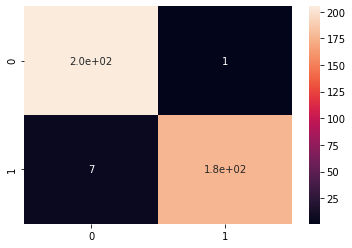

In [126]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
print(matrix)
sns.heatmap(matrix, annot = True)

In [103]:
image = X_test[0]
image.shape
img = np.array([image])
img.shape

(1, 256, 256, 1)

In [105]:
model.predict(img).round()

array([[1.]], dtype=float32)

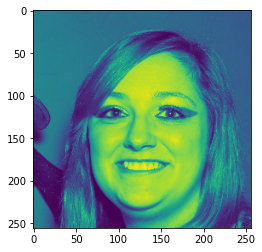

In [131]:
plt.imshow(X_test[0])

In [106]:
y_test[0]

1